# PyTplot pseudo variables

This notebook shows how to work with pseudo variables in PyTplot

The following line installs the version of pytplot used by pyspedas, so this notebook can be used in Google Colab.  If you're running in an environment where pyspedas is already installed, you can comment out or skip this command.

In [1]:
!pip install pyspedas


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pyspedas

In [3]:
pyspedas.mms.fpi(datatype='des-moms', trange=['2015-10-16', '2015-10-17'])
pyspedas.mms.edp(trange=['2015-10-16', '2015-10-17'], datatype='scpot')

26-Mar-24 13:57:32: Loading pydata/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151016040000_v3.4.0.cdf
26-Mar-24 13:57:32: Loading pydata/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151016060000_v3.4.0.cdf
26-Mar-24 13:57:32: Loading pydata/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151016080000_v3.4.0.cdf
26-Mar-24 13:57:32: Loading pydata/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151016100000_v3.4.0.cdf
26-Mar-24 13:57:32: Loading pydata/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151016120000_v3.4.0.cdf
26-Mar-24 13:57:32: Loading pydata/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151016140000_v3.4.0.cdf
26-Mar-24 13:57:32: Loading pydata/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151016160000_v3.4.0.cdf
26-Mar-24 13:57:33: Loaded variables:
26-Mar-24 13:57:33: Epoch
26-Mar-24 13:57:33: Epoch_plus_var
26-Mar-24 13:57:33: Epoch_minus_var
26-Mar-24 13:57:33

['mms1_edp_scpot_fast_l2', 'mms1_edp_psp_fast_l2', 'mms1_edp_dcv_fast_l2']

Create a pseudo variable containing the perpendicular and parallel temperatures

In [4]:
from pytplot import store_data

In [5]:
store_data('temp', data=['mms1_des_tempperp_fast', 'mms1_des_temppara_fast'])

True

Plot the pseudo variable

Note: by default, the figure uses the metadata from the first variable in the list

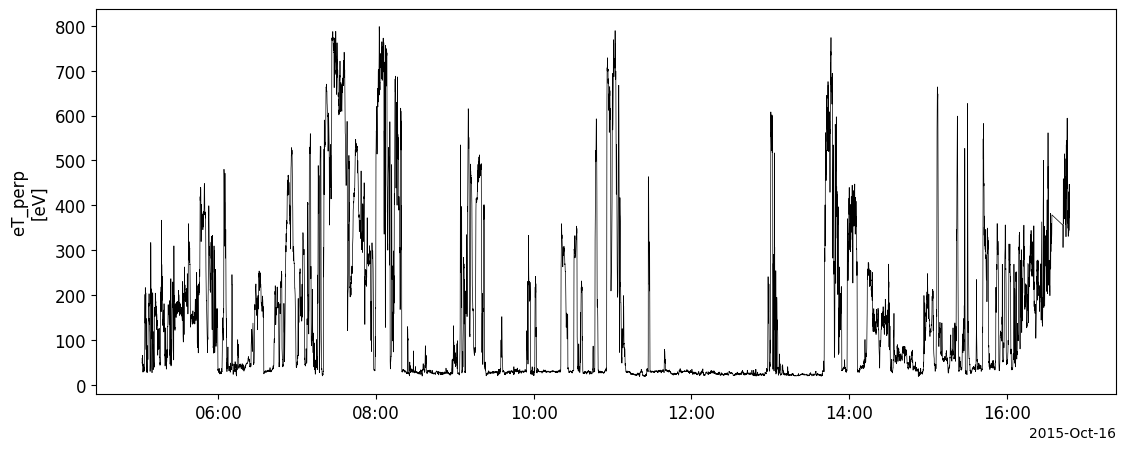

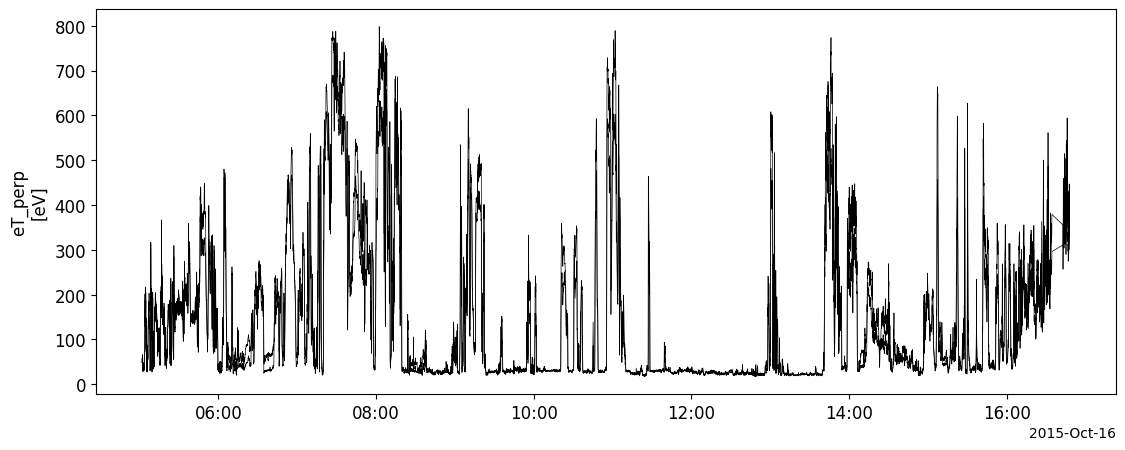

In [6]:
from pytplot import tplot
from pytplot import options
options('mms1_des_tempperp_fast','right_axis',True)
tplot('mms1_des_tempperp_fast')
tplot('temp')

The plot options can be updated just like a normal tplot variable

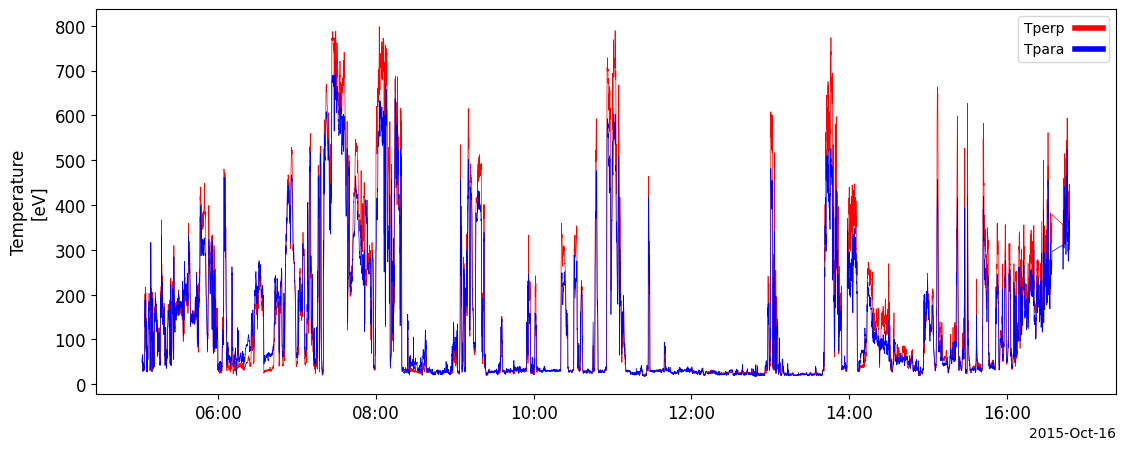

In [7]:
from pytplot import options

options('temp', 'ytitle', 'Temperature')
options('temp', 'color', ['red', 'blue'])
options('temp', 'legend_names', ['Tperp', 'Tpara'])

tplot('temp')

Pseudo variables can be used to plot lines over spectrograms, e.g., to plot the spacecraft potential over the ion energy spectra:


In [8]:
store_data('spec', data=['mms1_des_energyspectr_omni_fast', 'mms1_edp_scpot_fast_l2'])

True

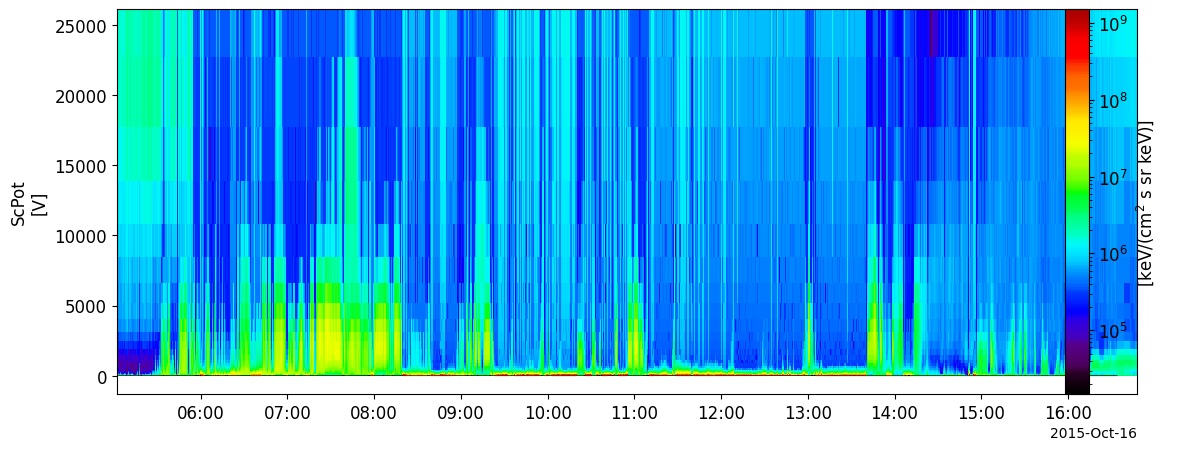

In [9]:
tplot('spec')

Options set on the variables used in the pseudo variable can be adjusted directly, e.g., 

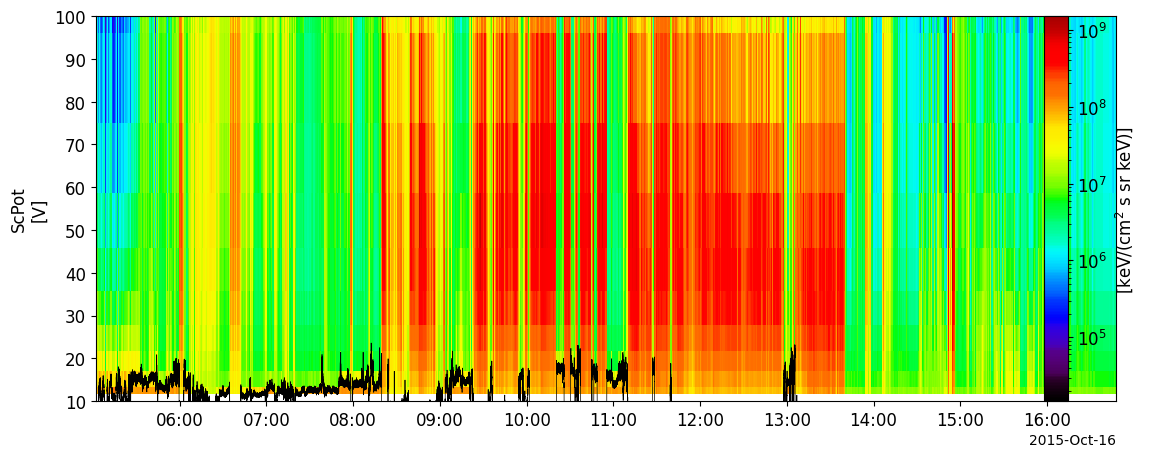

In [10]:
options('mms1_edp_scpot_fast_l2', 'yrange', [10, 100])

tplot('spec', xsize=12)

You may have to adjust some plot options for the figure to come out nicely, e.g., to plot the S/C potential on the right axis, use the `right_axis` option, and increase the margin to include enough space for the new axis

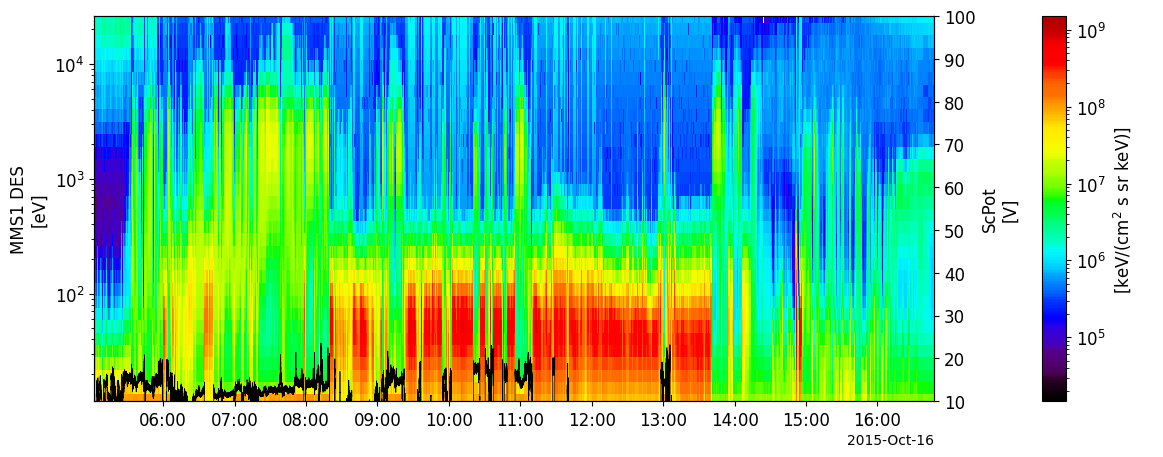

In [12]:
from pytplot import tplot_options

options('spec', 'right_axis', True)
tplot_options('xmargin', [0.1, 0.2])

tplot('spec', xsize=12)

We can also make a pseudovariable with multiple spectra.  For this example, we'll combine THEMIS ESA and SST data, which are acquired at the same time, but have disjoint energy ranges.

In [12]:
# Load THEMIS particle data for ESA and SST instruments
pyspedas.themis.esa(probe='a',trange=['2007-03-23','2007-03-24'])
pyspedas.themis.sst(probe='a',trange=['2007-03-23','2007-03-24'])

19-Feb-24 22:57:01: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/tha/l2/esa/2007/
19-Feb-24 22:57:02: File is current: themis_data/tha/l2/esa/2007/tha_l2_esa_20070323_v01.cdf
19-Feb-24 22:57:02: Unable to get ydata for variable tha_peif_densityQ
19-Feb-24 22:57:02: Unable to get ydata for variable tha_peif_avgtempQ
19-Feb-24 22:57:02: Unable to get ydata for variable tha_peif_vthermalQ
19-Feb-24 22:57:02: Unable to get ydata for variable tha_peif_sc_potQ
19-Feb-24 22:57:02: Unable to get ydata for variable tha_peif_en_efluxQ
19-Feb-24 22:57:02: Unable to get ydata for variable tha_peif_t3Q
19-Feb-24 22:57:02: Unable to get ydata for variable tha_peif_magt3Q
19-Feb-24 22:57:02: Unable to get ydata for variable tha_peif_ptensQ
19-Feb-24 22:57:02: Unable to get ydata for variable tha_peif_mftensQ
19-Feb-24 22:57:02: Unable to get ydata for variable tha_peif_fluxQ
19-Feb-24 22:57:02: Unable to get ydata for variable tha_peif_symmQ
19-Feb-24 22:57:02: Unable to get y

['tha_psif_data_quality',
 'tha_psif_en_eflux',
 'tha_psif_density',
 'tha_psif_avgtemp',
 'tha_psif_vthermal',
 'tha_psif_sc_pot',
 'tha_psif_t3',
 'tha_psif_magt3',
 'tha_psif_ptens',
 'tha_psif_mftens',
 'tha_psif_flux',
 'tha_psif_symm',
 'tha_psif_symm_ang',
 'tha_psif_magf',
 'tha_psif_velocity_dsl',
 'tha_psif_velocity_gse',
 'tha_psif_velocity_gsm',
 'tha_psef_data_quality',
 'tha_psef_en_eflux',
 'tha_psef_density',
 'tha_psef_avgtemp',
 'tha_psef_vthermal',
 'tha_psef_sc_pot',
 'tha_psef_t3',
 'tha_psef_magt3',
 'tha_psef_ptens',
 'tha_psef_mftens',
 'tha_psef_flux',
 'tha_psef_symm',
 'tha_psef_symm_ang',
 'tha_psef_magf',
 'tha_psef_velocity_dsl',
 'tha_psef_velocity_gse',
 'tha_psef_velocity_gsm',
 'tha_pseb_data_quality',
 'tha_pseb_en_eflux',
 'tha_pseb_density',
 'tha_pseb_avgtemp',
 'tha_pseb_vthermal',
 'tha_pseb_sc_pot',
 'tha_pseb_t3',
 'tha_pseb_magt3',
 'tha_pseb_ptens',
 'tha_pseb_mftens',
 'tha_pseb_flux',
 'tha_pseb_symm',
 'tha_pseb_symm_ang',
 'tha_pseb_magf'

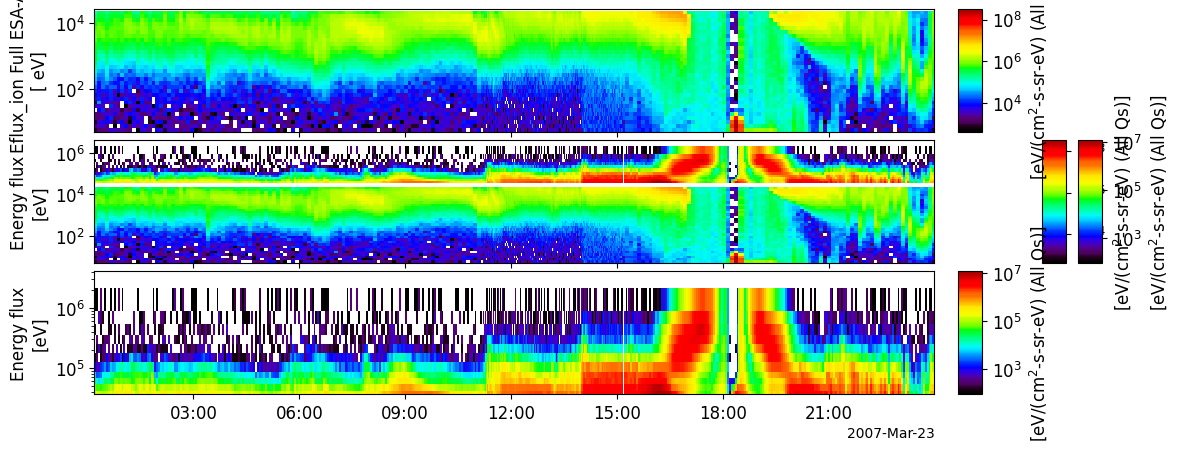

In [13]:
# Make a combined variable with both ESA and SST spectral data
store_data('combined_spec',['tha_peif_en_eflux','tha_psif_en_eflux'])
options('tha_peif_en_eflux','y_no_resample',1)
vars=['tha_peif_en_eflux','combined_spec', 'tha_psif_en_eflux']
tplot(vars)


We can also use pseudovariables to make a plot combining survey and burst data from the same instrument:

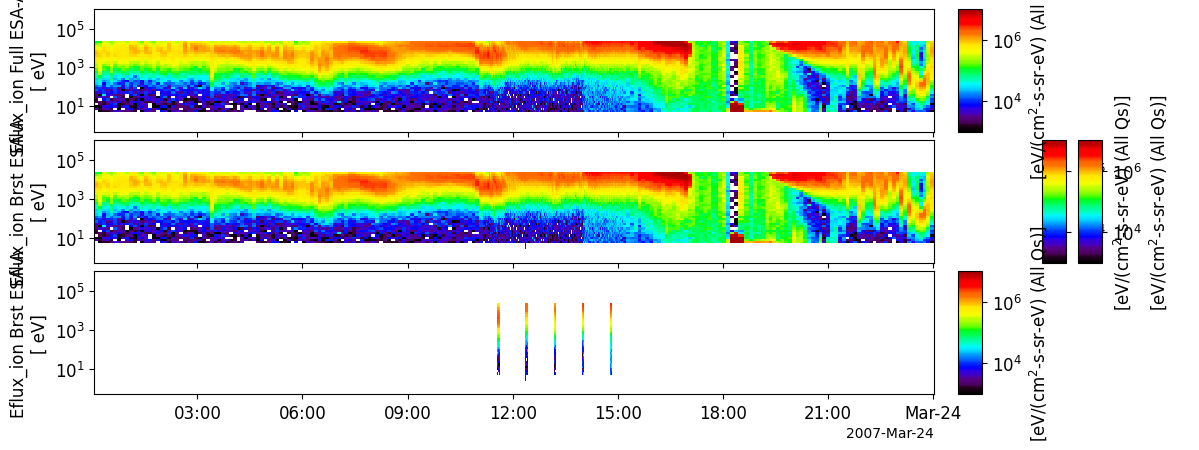

In [14]:
from pytplot import zlim,ylim
store_data('esa_srvy_burst',['tha_peif_en_eflux','tha_peib_en_eflux'])
options('tha_peif_en_eflux','y_no_resample',1)
zlim('tha_peif_en_eflux',1.0e3,1.0e7)
options('tha_peif_en_eflux','y_range',[0.5,1.0e6])

options('tha_peib_en_eflux','y_no_resample',1)
zlim('tha_peib_en_eflux',1.0e3,1.0e7)
options('tha_peib_en_eflux','y_range',[0.5,1.0e6])
options('tha_peib_en_eflux','data_gap',4.0)
vars=['tha_peif_en_eflux','esa_srvy_burst','tha_peib_en_eflux']
tplot(vars)

Let's zoom in on one of the particle burst intervals.

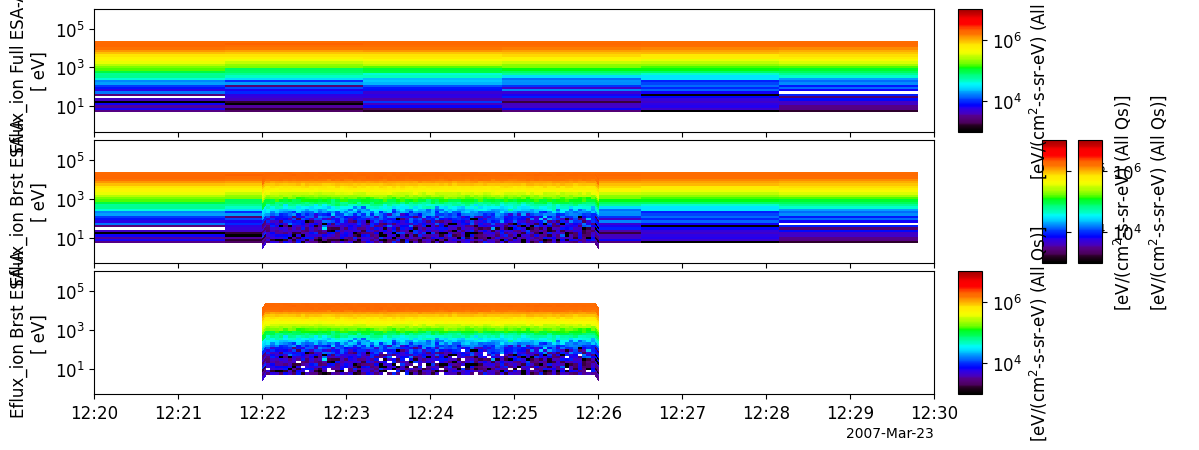

In [15]:
from pytplot import timespan
timespan('2007-03-23/12:20',10,'minutes')
tplot(vars)

In [16]:
from pytplot import get_data
atts=get_data('tha_peib_en_eflux',metadata=True)
print(atts)

{'CDF': {'VATT': {'DISPLAY_TYPE': 'spectrogram', 'FILLVAL': nan, 'FORMAT': 'E13.6', 'DEPEND_TIME': 'tha_peib_time', 'DEPEND_EPOCH0': 'tha_peib_epoch0', 'DEPEND_0': 'tha_peib_epoch', 'VAR_TYPE': 'data', 'PROPERTY': 'spectrogram', 'SC_ID': 'a', 'CATDESC': '-----Ion Energy Flux spectrogram', 'FIELDNAM': 'Eflux_ion Brst ESA-A(all qualities)', 'VALIDMIN': 0.0, 'VALIDMAX': 10000000000.0, 'LABLAXIS': 'Eflux_ion Brst ESA-A', 'SCALETYP': 'log', 'UNITS': 'eV/(cm^2-s-sr-eV) (All Qs)', 'SI_CONVERSION': '1.0e4>J m^-2 s^-1 sr^-1 J^-1', 'COORDINATE_SYSTEM': 'DSL (Despun Spacecraft)', 'DEPEND_1': 'tha_peib_en_eflux_yaxis'}, 'GATT': {'Project': 'THEMIS', 'Source_name': 'THA>Themis Probe A', 'Discipline': 'Space Physics>Magnetospheric Science', 'Data_type': 'ESA', 'Descriptor': 'L2>L2 DATA', 'Data_version': '1', 'PI_name': 'V. Angelopoulos, C.W. Carlson & J. McFadden', 'PI_affiliation': 'UCB, NASA NAS5-02099', 'TITLE': 'Electrostatic Analyzer (ESA)', 'TEXT': 'THEMIS-A: Electrostatic Analyzer (ESA): Elec